In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [106]:
# util for plotting

def plot_util(coef_list, figsize=(18, 5), heatmap=False):
    C = [1.0, 0.1, 0.01]
    plt.figure(figsize=figsize)
    for i in range(3):
        plt.subplot(1,3,i+1)
        if heatmap:
            sns.heatmap(coef_list[i].reshape(8,8), annot=True, cbar=False)
        else:
            plt.imshow(coef_list[i].reshape(8,8))
        plt.title(f"C={C[i]}")

## Data 

In [9]:
X, y = load_digits(return_X_y=True)

# Lets scale the data and pose the poblem as a binary classification
# We classify 8x8 images of digits into two classes: 0-4 against 5-9. 

X = StandardScaler().fit_transform(X)
y = (y>4).astype('int')

##  LogisticRegression with L1 penalty

In [107]:

coef_list = []
for c in [1.0, 0.1, 0.01]:
    lr_l1 = LogisticRegression(C=c, penalty='l1', solver='saga', tol=0.01).fit(X,y)
    coef_list.append(lr_l1.coef_)

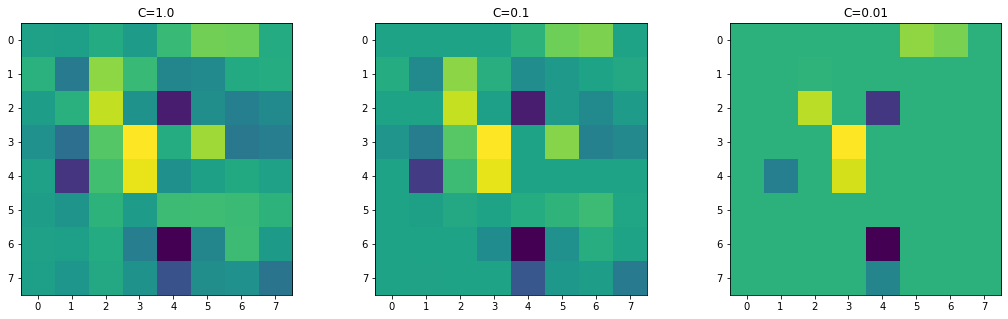

In [108]:
plot_util(coef_list)

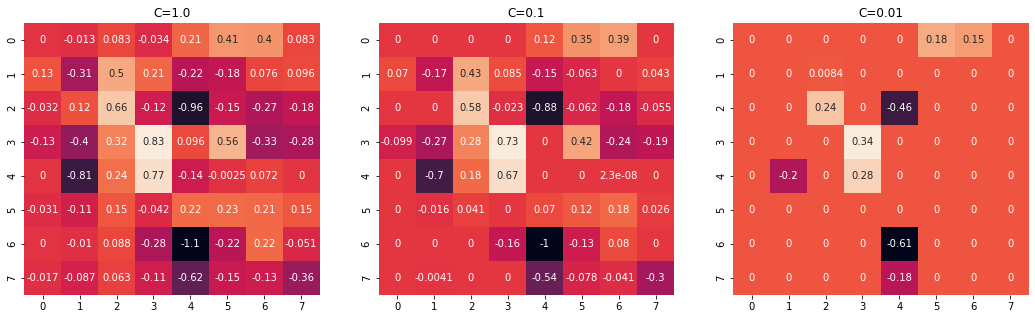

In [109]:
plot_util(coef_list ,heatmap=True)

## Logistic Regression with L2 penalty

In [110]:

coef_list = []
for c in [1.0, 0.1, 0.01]:
    lr_l2 = LogisticRegression(C=c, penalty='l2', solver='saga', tol=0.01).fit(X,y)
    coef_list.append(lr_l2.coef_)

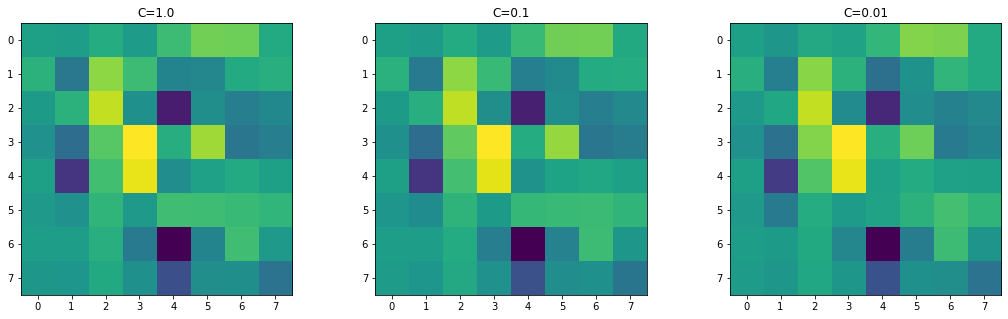

In [111]:
plot_util(coef_list)

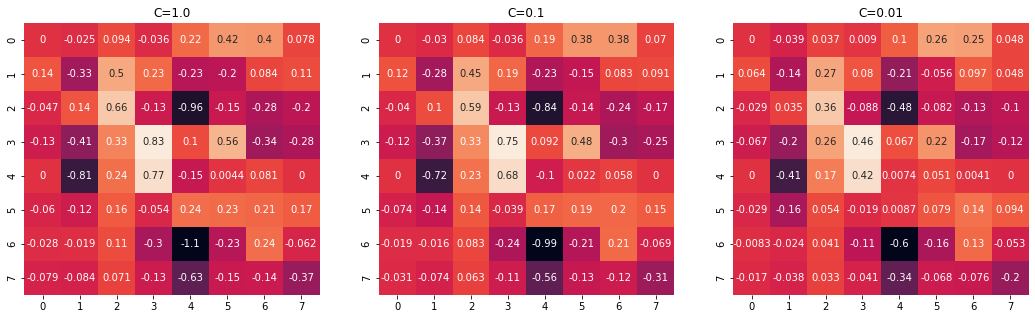

In [112]:
plot_util(coef_list, heatmap=True)

## Logistic Regression with Elastic-net penalty

In [113]:

coef_list = []
for c in [1.0, 0.1, 0.01]:
    lr_en = LogisticRegression(C=c, penalty='elasticnet', l1_ratio=0.5, solver='saga', tol=0.01).fit(X,y)
    coef_list.append(lr_en.coef_)

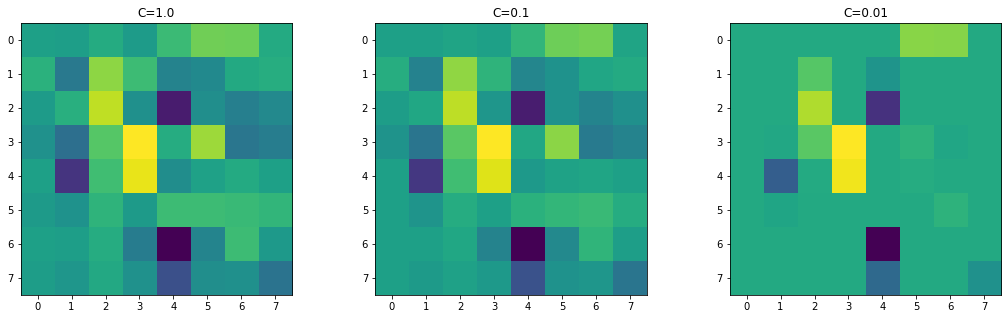

In [114]:
plot_util(coef_list)

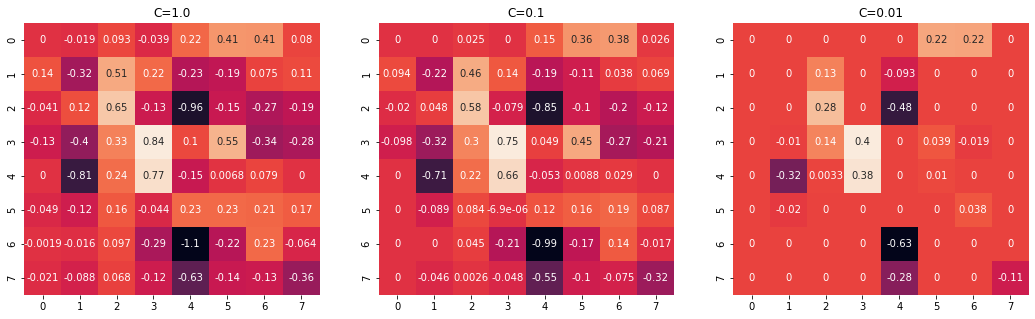

In [115]:
plot_util(coef_list, heatmap=True)